In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xtools as xt

from scipy.linalg import block_diag
from openjij import SQASampler, SASampler

from atm.flight.generator import ScenarioGenerator
from atm.separation import recat


In [2]:
cf = xt.Config(dict(
    dt=10,
    num=3,
    scenario=dict(
        interval=120,
        window=120,
        mode="mix",
        standard="recat"
    )
))


In [16]:
pattern = recat.SeparationPattern
pattern.reparameterize(dt=cf.dt, max_time_window=cf.scenario.window)

sgen = ScenarioGenerator(cf.scenario)
vols = sgen(cf.num)

num_slot = cf.scenario.window // cf.dt
num_qubit = num_slot * cf.num


In [17]:
costs = []
for id1, vol1 in enumerate(vols):
    costs_row = []
    for id2, vol2 in enumerate(vols):
        print("(", vol1, ",", vol2, "):", pattern.retrieve_table(vol1, vol2).shape)
        if vol1 == vol2:
            costs_row.append(np.zeros((num_slot, num_slot)))
            continue
        # print("")
        costs_row.append(pattern.retrieve_table(vol1, vol2))
    cost_row = np.hstack(costs_row)
    print(cost_row.shape)
    costs.append(cost_row)

( Flight(VOL0001: [54-174] wtc:B ope:A) , Flight(VOL0001: [54-174] wtc:B ope:A) ): (12, 12)
( Flight(VOL0001: [54-174] wtc:B ope:A) , Flight(VOL0002: [130-250] wtc:E ope:D) ): (12, 12)
( Flight(VOL0001: [54-174] wtc:B ope:A) , Flight(VOL0003: [332-452] wtc:A ope:D) ): (12, 12)
(12, 36)
( Flight(VOL0002: [130-250] wtc:E ope:D) , Flight(VOL0001: [54-174] wtc:B ope:A) ): (12, 12)
( Flight(VOL0002: [130-250] wtc:E ope:D) , Flight(VOL0002: [130-250] wtc:E ope:D) ): (12, 12)
( Flight(VOL0002: [130-250] wtc:E ope:D) , Flight(VOL0003: [332-452] wtc:A ope:D) ): (12, 12)
(12, 36)
( Flight(VOL0003: [332-452] wtc:A ope:D) , Flight(VOL0001: [54-174] wtc:B ope:A) ): (12, 12)
( Flight(VOL0003: [332-452] wtc:A ope:D) , Flight(VOL0002: [130-250] wtc:E ope:D) ): (12, 12)
( Flight(VOL0003: [332-452] wtc:A ope:D) , Flight(VOL0003: [332-452] wtc:A ope:D) ): (12, 12)
(12, 36)


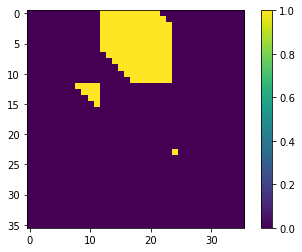

In [19]:
q_sep = np.vstack(costs)
plt.imshow(q_sep)
plt.colorbar()